In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
!pip install clean-text
from cleantext import clean
import matplotlib.pyplot as plt
import math

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 4.3 MB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=5cea9a9d0dfa0760c3c7ee0cbee95939298ab14d8bba98652aee18b9dd6d3f4f
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [ ]:
text = """The Metropolitan Police, the UK's largest police force, was placed under special measures this week after a series of failures.

The watchdog said there are now six police forces in special measures.

The forces are the Met, Greater Manchester, Cleveland, Gloucestershire, Staffordshire and Wiltshire.

Inspectors have raised "systemic concerns" about the Met, including its substandard response to emergency calls, "barely adequate" crime recording and a backlog of child abuse referrals.

A watchdog letter to the Met said failures have been exacerbated by the number of young and inexperienced recruits brought in as part of the national drive to replace thousands of officers cut during austerity measures.Matt Parr, from HMICFRS, wrote to acting Met Commissioner Sir Stephen House, saying the organisation has had "substantial and persistent concerns" about the force "for a considerable time".

These included the findings of a damning report in March which said the force's approach to tackling corruption was "fundamentally flawed" and "not fit for purpose".

Wiltshire Police was the latest to confirm it will move into special measures.

PCC Philip Wilkinson told BBC Radio Wiltshire's Dan O'Brien that a report into the force, due to be released next week, will show the change.

He said: "My role as PCC is clear: to be the public's voice on policing, to scrutinise, challenge and support Wiltshire Police to provide an effective, efficient, policing service which meets the needs of its communities and to hold Wiltshire Police to account for the service it provides to the public.

"I am aware of, and welcome, Her Majesty's Inspectorate of Constabulary and Fire & Rescue Services (HMICFRS) intention to provide closer scrutiny to Wiltshire Police further to their recent PEEL (Police Efficiency, Effectiveness and Legitimacy) inspection, and their intention to move Wiltshire Police to the 'engage' phase of scrutiny.

"We remain in close contact with the Inspectorate and I will be able to make a more detailed statement once the inspection report has been published in full."

"""

In [ ]:
clean_text = clean(text,
    fix_unicode=True,               # fix various unicode errors
    to_ascii=True,                  # transliterate to closest ASCII representation
    lower=True,                     # lowercase text
    no_line_breaks=True,           # fully strip line breaks as opposed to only normalizing them
    no_urls=True,                  # replace all URLs with a special token
    no_emails=True,                # replace all email addresses with a special token
    no_phone_numbers=True,         # replace all phone numbers with a special token
    no_numbers=True,               # replace all numbers with a special token
    no_digits=True,                # replace all digits with a special token
    no_currency_symbols=True,      # replace all currency symbols with a special token
    no_punct=True,                 # remove punctuations
    replace_with_punct="",          # instead of removing punctuations you may replace them
    replace_with_url="",
    replace_with_email="",
    replace_with_phone_number="",
    replace_with_number="",
    replace_with_digit="",
    replace_with_currency_symbol="",
    lang="en"                       # set to 'de' for German special handling
)

In [ ]:
en_stops = set(stopwords.words('english'))

words = word_tokenize(clean_text)


frequencyTable = dict()
for word in words:
  word = word.lower()
  if word in en_stops:
    continue
  word = (lemmatizer.lemmatize(word))
  if word in frequencyTable:
    frequencyTable[word] += 1
  else:
    frequencyTable[word] = 1

print(frequencyTable)

{'metropolitan': 1, 'police': 9, 'uk': 1, 'largest': 1, 'force': 6, 'placed': 1, 'special': 3, 'measure': 3, 'week': 2, 'series': 1, 'failure': 2, 'watchdog': 2, 'said': 4, 'six': 1, 'met': 4, 'greater': 1, 'manchester': 1, 'cleveland': 1, 'gloucestershire': 1, 'staffordshire': 1, 'wiltshire': 6, 'inspector': 1, 'raised': 1, 'systemic': 1, 'concern': 2, 'including': 1, 'substandard': 1, 'response': 1, 'emergency': 1, 'call': 1, 'barely': 1, 'adequate': 1, 'crime': 1, 'recording': 1, 'backlog': 1, 'child': 1, 'abuse': 1, 'referral': 1, 'letter': 1, 'exacerbated': 1, 'number': 1, 'young': 1, 'inexperienced': 1, 'recruit': 1, 'brought': 1, 'part': 1, 'national': 1, 'drive': 1, 'replace': 1, 'thousand': 1, 'officer': 1, 'cut': 1, 'austerity': 1, 'measuresmatt': 1, 'parr': 1, 'hmicfrs': 2, 'wrote': 1, 'acting': 1, 'commissioner': 1, 'sir': 1, 'stephen': 1, 'house': 1, 'saying': 1, 'organisation': 1, 'substantial': 1, 'persistent': 1, 'considerable': 1, 'time': 1, 'included': 1, 'finding': 1

In [ ]:
sentences = sent_tokenize(text)
sentenceValue = dict()

for sentence in sentences:
  for word, freq in frequencyTable.items():
    word = (lemmatizer.lemmatize(word))
    if word in sentence.lower():
      if sentence in sentenceValue:
        sentenceValue[sentence] += freq
      else:
        sentenceValue[sentence] = freq

sumValues = 0;
for sentence in sentenceValue:
  sumValues += sentenceValue[sentence]

average = int(sumValues/len(sentenceValue))

summary = ''
for sentence in sentences:
  if(sentence in sentenceValue) and (sentenceValue[sentence] > (1.3*average)):
    summary+= " " + sentence

print(sentenceValue)

{"The Metropolitan Police, the UK's largest police force, was placed under special measures this week after a series of failures.": 34, 'The watchdog said there are now six police forces in special measures.': 28, 'The forces are the Met, Greater Manchester, Cleveland, Gloucestershire, Staffordshire and Wiltshire.': 21, 'Inspectors have raised "systemic concerns" about the Met, including its substandard response to emergency calls, "barely adequate" crime recording and a backlog of child abuse referrals.': 22, 'A watchdog letter to the Met said failures have been exacerbated by the number of young and inexperienced recruits brought in as part of the national drive to replace thousands of officers cut during austerity measures.Matt Parr, from HMICFRS, wrote to acting Met Commissioner Sir Stephen House, saying the organisation has had "substantial and persistent concerns" about the force "for a considerable time".': 54, 'These included the findings of a damning report in March which said

In [ ]:
print(summary)

 A watchdog letter to the Met said failures have been exacerbated by the number of young and inexperienced recruits brought in as part of the national drive to replace thousands of officers cut during austerity measures.Matt Parr, from HMICFRS, wrote to acting Met Commissioner Sir Stephen House, saying the organisation has had "substantial and persistent concerns" about the force "for a considerable time". He said: "My role as PCC is clear: to be the public's voice on policing, to scrutinise, challenge and support Wiltshire Police to provide an effective, efficient, policing service which meets the needs of its communities and to hold Wiltshire Police to account for the service it provides to the public. "I am aware of, and welcome, Her Majesty's Inspectorate of Constabulary and Fire & Rescue Services (HMICFRS) intention to provide closer scrutiny to Wiltshire Police further to their recent PEEL (Police Efficiency, Effectiveness and Legitimacy) inspection, and their intention to move W

# ***`Analysis of the output `***





In [ ]:
print("The length of input is " + str(len(text))+ " words whereas the summarised output is " + str(len(summary))+ " words")
print("\n")
res = len(summary)/len(text)*100
print("This means the summary is now "+ str(math.trunc(res))+ "% of the input")

The length of input is 2094 words whereas the summarised output is 1050 words


This means the summary is now 50% of the input


In [ ]:
from operator import itemgetter
res = dict(sorted(frequencyTable.items(), key = itemgetter(1), reverse = True)[:5])
print("The most frequent root words are  " + str(res))

The most frequent root words are  {'police': 9, 'force': 6, 'wiltshire': 6, 'said': 4, 'met': 4}


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
word_cloud = WordCloud(collocations = False, background_color = 'white',width=800, height=400).generate(text)

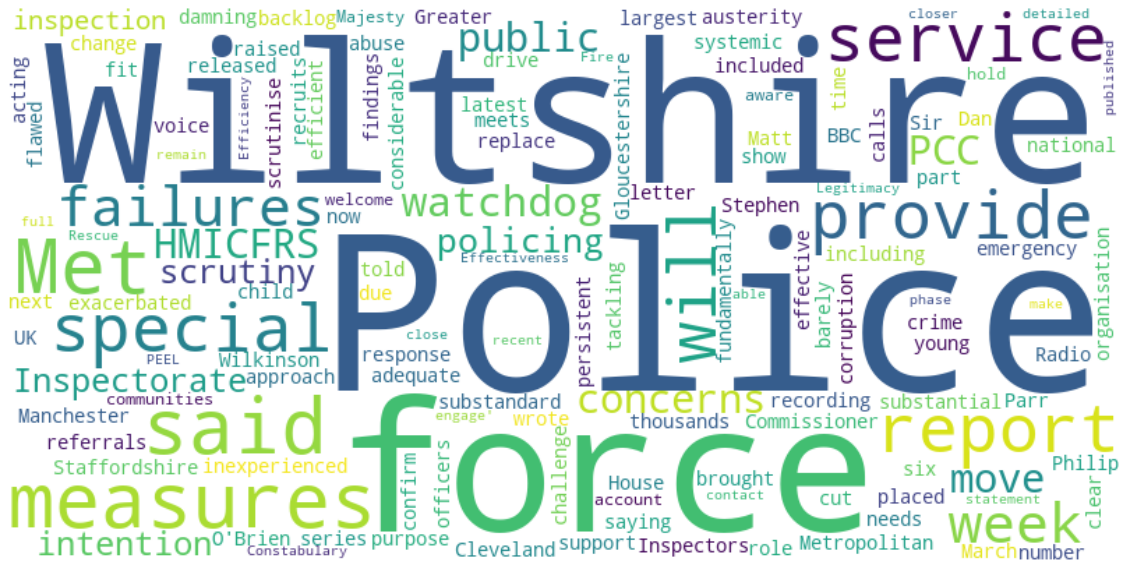

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
word_cloud_summary = WordCloud(collocations = False, background_color = 'white',width=800, height=400).generate(summary)

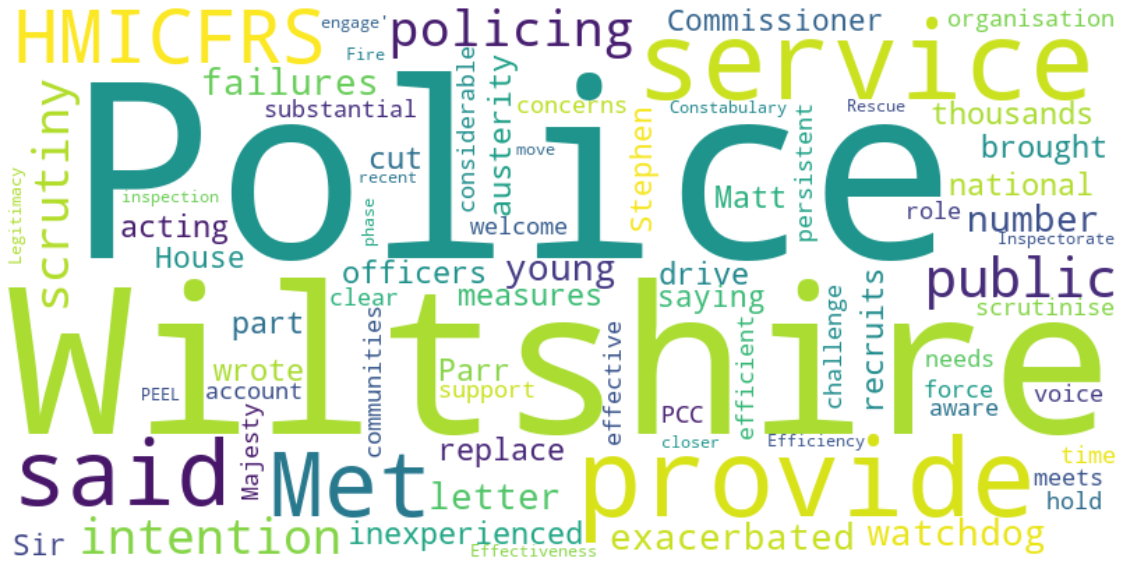

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(word_cloud_summary, interpolation='bilinear')
plt.axis("off")
plt.show()